Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

Loading Data and Processing

In [2]:
exercise=pd.read_csv('C:\\Users\\USER\\Downloads\\archive//exercise.csv')
calories=pd.read_csv('C:\\Users\\USER\\Downloads\\archive//calories.csv')

In [8]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Join the DataFrames

In [4]:
calories_data=pd.concat([exercise, calories['Calories']], axis=1)
calories_data.head()
calories_data['Gender'] = calories_data['Gender'].str.replace(' ','')


In [26]:
calories_data.shape

(15000, 9)

In [11]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Check for missing data

In [12]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [13]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

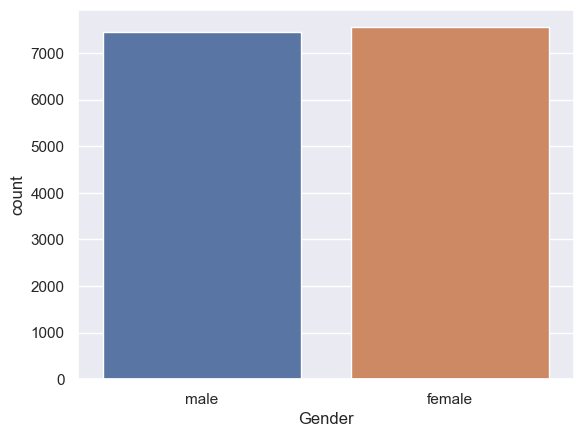

In [33]:
sns.set()
sns.countplot(x = calories_data['Gender'])

Find the distribuition of the Age column

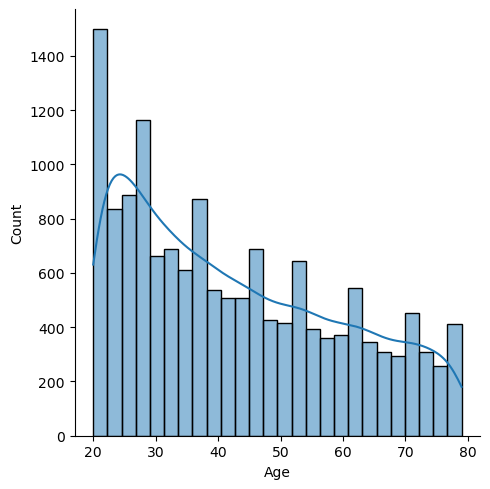

In [6]:
sns.displot(calories_data['Age'],kde=True)

Find the distribuition of the Height column

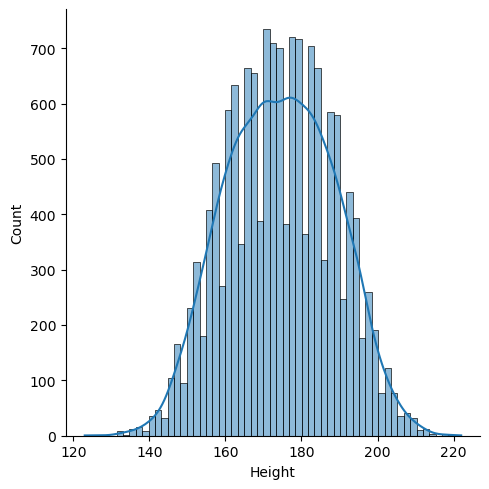

In [7]:
sns.displot(calories_data['Height'],kde=True)

Find the distribuition of the Weight column

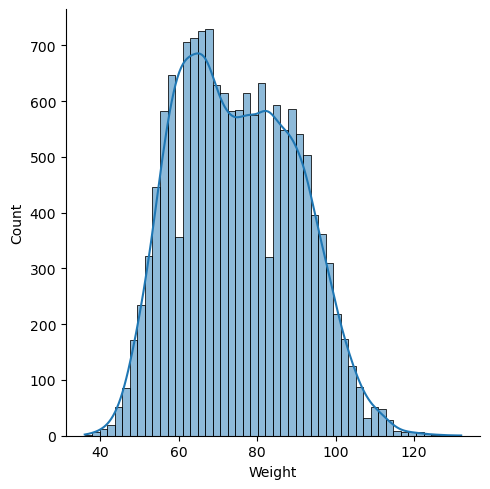

In [9]:
sns.displot(calories_data['Weight'],kde=True)

Correlation between dataset

In [5]:
correlation=calories_data.corr(numeric_only=True)

Heatmap to understand correlation

<Axes: >

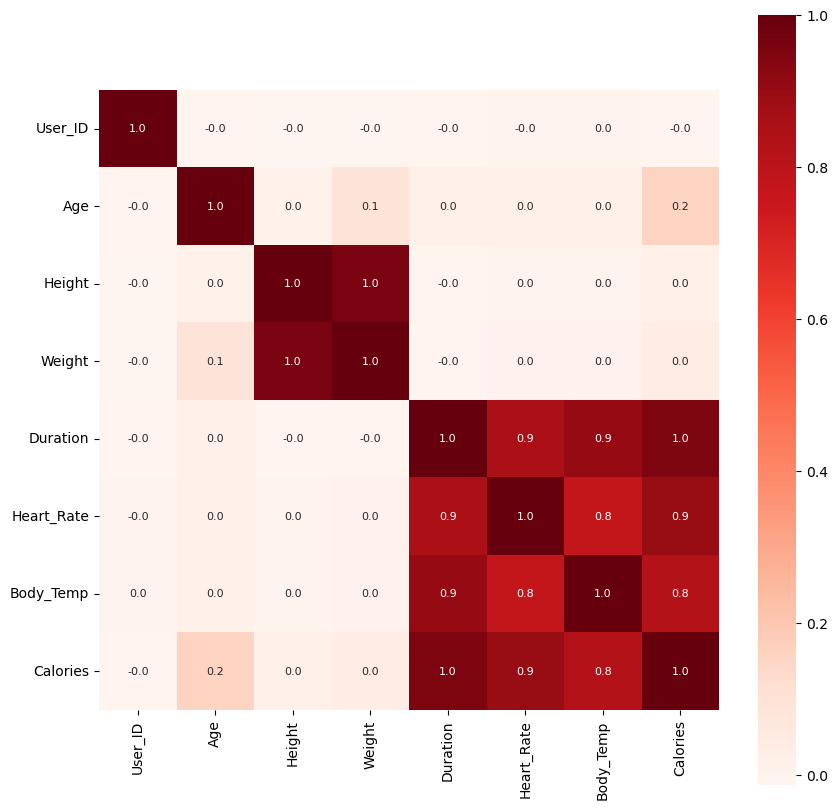

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

Converting text data into numerical values

In [13]:
calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)
calories_data.dtypes

User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

Selection of Features and Targets

In [14]:
X=calories_data.iloc[:,1:-1]
X.head()
y=calories_data.iloc[:,-1]
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

Split Data into Train and Test Data

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape)


(15000, 7) (12000, 7)


Model Training with XGBoost Regressor

In [16]:
Xgb=XGBRegressor()
Xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction and Evaluation on Test Data

In [17]:
predictions = Xgb.predict(X_test)
print(predictions)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [19]:
mae=metrics.mean_absolute_error(y_test,predictions)
print('Mean Absolute Error:',mae)

Mean Absolute Error: 1.4833678883314132
